# HW7

- Ідентифікувати та описати проблеми у цій візуалізації даних (я очікую від вас текст)
- Зробити альтернативний варіант презентації цих даних (я очікую від вас візуалізацію та пояснення, чому вона працює ліпше, ніж оригінальна)

#### Solution:

For this task we have the following dataset. Here we can see all the regions of Ukraine & for each region we have two sets of data. One set of data indicates 2010 year, the other 2017.

The region has 5 columns showing the percentage of money/time that the country dedicated to a particular industry. The industries are agriculture, industry, construction, services & governance.

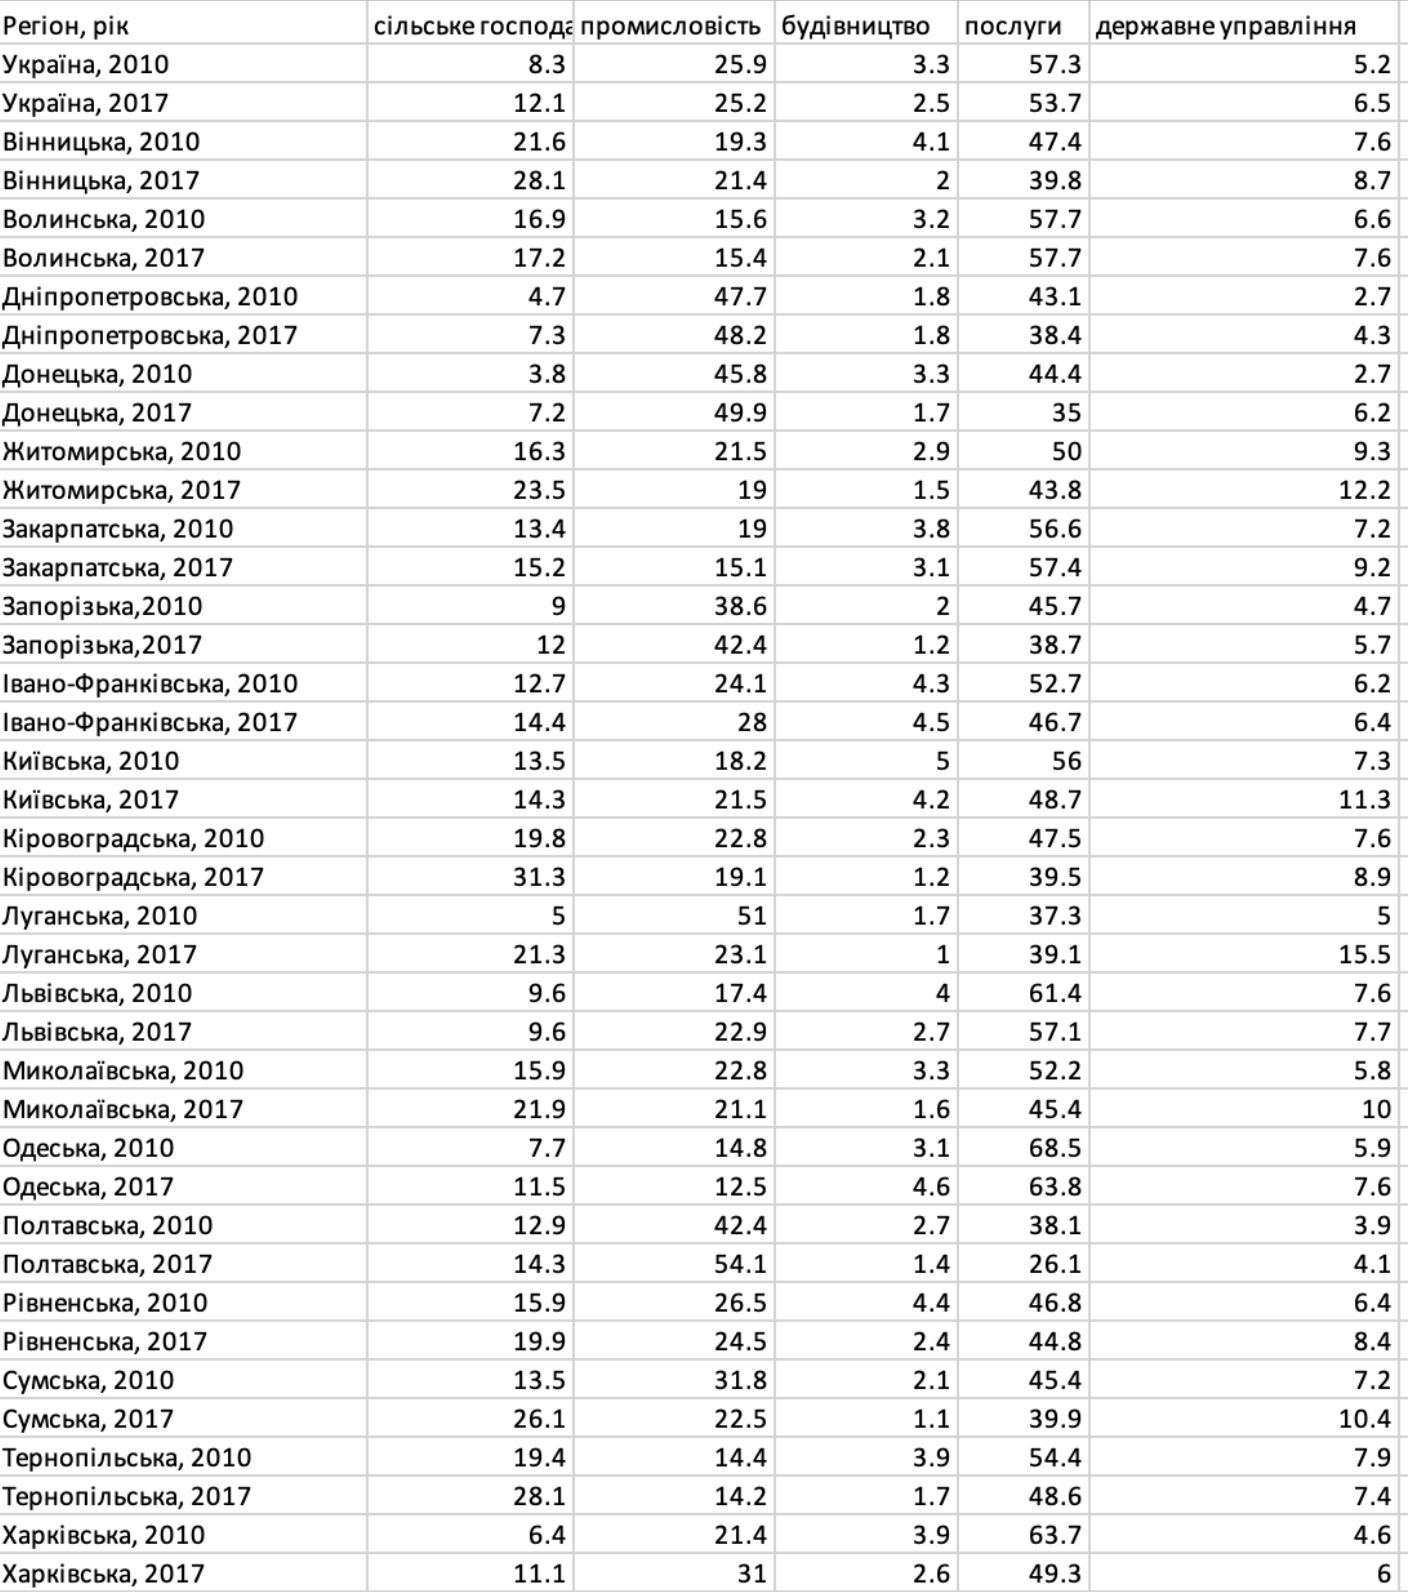

Example of data given for task 8.

The visualization looks like this:

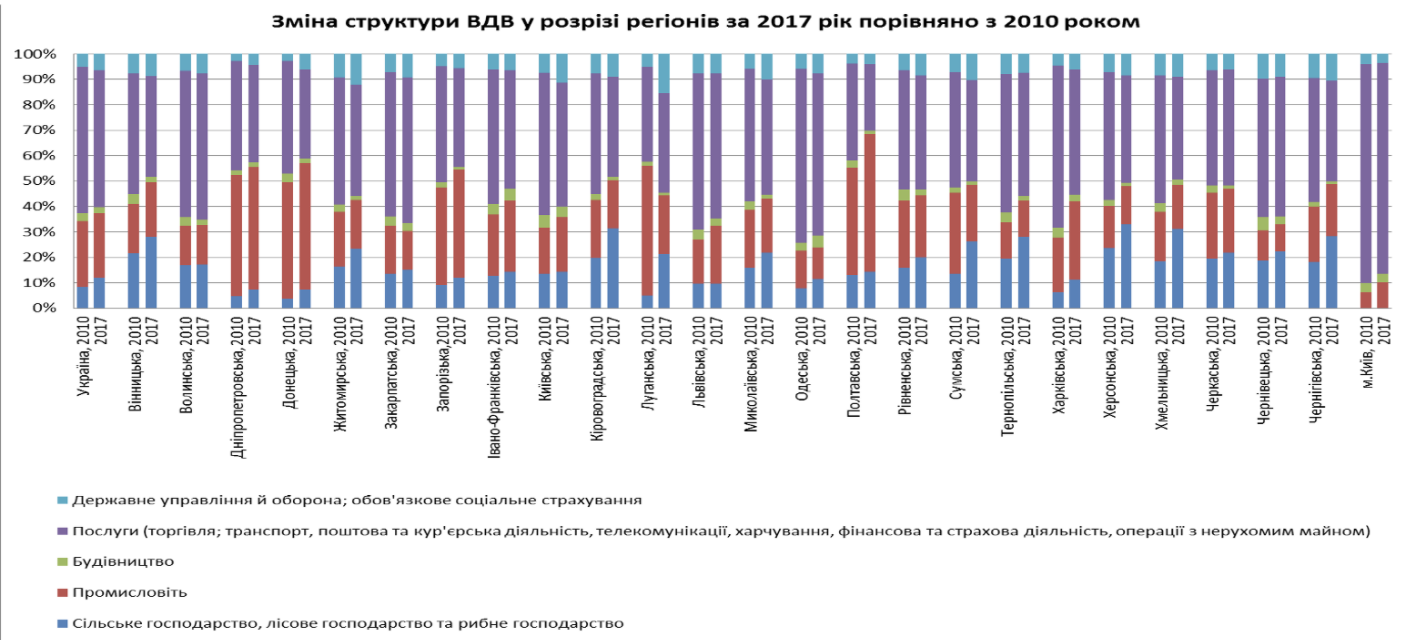

Here we can see a lot of drawbacks, when the user (P.S. me)) is watching it.

1. Here the two years are combined together and we can't compare the distribution of 5 categories separately
    1. It is not clear how the distribution of 5 categories over the years had changed
    2. We can't easily compare the distribution of the categories over 1 year because there is two years combined together
2. Not clear how the industries were distributed over the map of Ukraine (over the regions)
3. The data was not analysed, because
    1. The option 'Ukraine' was not deleted
    2. The option 'city Kyiv' was not changed to the region name

In [1]:
import pandas as pd
import altair as alt
# ! pip install geopandas
import geopandas as gpd

In [86]:
ukraine = gpd.read_file('./data/ukraine.json')
ukraine.head()

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,UKR,Ukraine,UKR.1_1,Cherkasy,Cherkas'ka Oblast'|Cherkasskaya Oblast'|Cherkassy,None,Oblast',Region,None,UA.CK,"MULTIPOLYGON (((31.32614 48.74507, 31.31716 48..."
1,UKR,Ukraine,UKR.2_1,Chernihiv,Chernigov|Tschernigow,None,Oblast',Region,None,UA.CH,"MULTIPOLYGON (((33.09283 50.50966, 33.09261 50..."
2,UKR,Ukraine,UKR.3_1,Chernivtsi,Chernivets'ka Oblast'|Chernovitskaya Oblast'|C...,None,Oblast',Region,None,UA.CV,"MULTIPOLYGON (((24.93280 47.72794, 24.93301 47..."
3,UKR,Ukraine,UKR.4_1,Crimea,Crimée|Criméia|Krim|Krymskaya Respublika|Respu...,None,Autonomous Republic,Autonomous Republic,None,UA.KR,"MULTIPOLYGON (((33.79291 44.39153, 33.79465 44..."
4,UKR,Ukraine,UKR.5_1,Dnipropetrovs'k,Dnipropetrovsk|Dniepropietrovsk|Dnjepropetrowsk,None,Oblast',Region,None,UA.DP,"MULTIPOLYGON (((33.93176 47.48407, 33.92332 47..."


In [87]:
industries = pd.read_excel('./data/1.4_02.xlsx')
industries.head()

,"Регіон, рік",сільське господарство,промисловість,будівництво,послуги,державне управління
0,"Україна, 2010",8.3,25.9,3.3,57.3,5.2
1,"Україна, 2017",12.1,25.2,2.5,53.7,6.5
2,"Вінницька, 2010",21.6,19.3,4.1,47.4,7.6
3,"Вінницька, 2017",28.1,21.4,2.0,39.8,8.7
4,"Волинська, 2010",16.9,15.6,3.2,57.7,6.6


In [88]:
industries['region'] = industries['Регіон, рік'].apply(lambda x: x.split(',')[0])
industries['year'] = industries['Регіон, рік'].apply(lambda x: int(x.split(',')[1]))
industries.drop(['Регіон, рік'], axis=1, inplace=True)
industries.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
0,8.3,25.9,3.3,57.3,5.2,Україна,2010
1,12.1,25.2,2.5,53.7,6.5,Україна,2017
2,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
3,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
4,16.9,15.6,3.2,57.7,6.6,Волинська,2010


### Data analysis

In [89]:
industries.describe()

,сільське господарство,промисловість,будівництво,послуги,державне управління,year
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,15.919231,24.475000,2.721154,49.625000,7.259615,2013.500000
std,7.909489,11.583725,1.148116,10.857615,2.450151,3.534147
min,0.000000,6.200000,1.000000,26.100000,2.700000,2010.000000
25%,10.725000,17.175000,1.775000,42.900000,5.875000,2010.000000
50%,15.550000,21.500000,2.650000,48.000000,7.250000,2013.500000
75%,21.375000,26.050000,3.525000,55.100000,8.750000,2017.000000
max,33.000000,54.100000,5.300000,86.200000,15.500000,2017.000000


In [90]:
industries[industries['region'] == 'Київська']

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
18,13.5,18.2,5.0,56.0,7.3,Київська,2010
19,14.3,21.5,4.2,48.7,11.3,Київська,2017


In [91]:
industries[industries['region'] == 'м.Київ']

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
50,0.0,6.2,3.6,86.2,4.0,м.Київ,2010
51,0.0,10.1,3.5,82.8,3.6,м.Київ,2017


### Combine Kyiv region values

In [92]:
lst_industries = list(industries.columns[:-2])
lst_to_add10, lst_to_add17 = [], []

for industry in lst_industries:
    val10 = industries[industries['region'] == 'Київська'][industry][18] + industries[industries['region'] == 'м.Київ'][industry][50]
    val17 = industries[industries['region'] == 'Київська'][industry][19] + industries[industries['region'] == 'м.Київ'][industry][51]
    lst_to_add10.append(val10)
    lst_to_add17.append(val17)

lst_to_add10 += ['Київська', 2010]
lst_to_add17 += ['Київська', 2017]

# lst_to_add10, lst_to_add17
d_lst_to_add10 = {
    'сільське господарство': lst_to_add10[0],
    'промисловість': lst_to_add10[1],
    'будівництво': lst_to_add10[2],
    'послуги': lst_to_add10[3],
    'державне управління': lst_to_add10[4],
    'region': lst_to_add10[5],
    'year': lst_to_add10[6]
}
d_lst_to_add17 = {
    'сільське господарство': lst_to_add17[0],
    'промисловість': lst_to_add17[1],
    'будівництво': lst_to_add17[2],
    'послуги': lst_to_add17[3],
    'державне управління': lst_to_add17[4],
    'region': lst_to_add17[5],
    'year': lst_to_add17[6]
}   

In [93]:
industries = industries[industries['region'] != 'м.Київ']
industries = industries[industries['region'] != 'Київська']
industries = industries[industries['region'] != 'Україна']
industries.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
2,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
3,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
4,16.9,15.6,3.2,57.7,6.6,Волинська,2010
5,17.2,15.4,2.1,57.7,7.6,Волинська,2017
6,4.7,47.7,1.8,43.1,2.7,Дніпропетровська,2010


In [94]:
industries = industries.append(d_lst_to_add10, ignore_index=True)
industries = industries.append(d_lst_to_add17, ignore_index=True)
industries.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
0,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
1,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
2,16.9,15.6,3.2,57.7,6.6,Волинська,2010
3,17.2,15.4,2.1,57.7,7.6,Волинська,2017
4,4.7,47.7,1.8,43.1,2.7,Дніпропетровська,2010


In [95]:
industries[industries['region'] == 'Київська']

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
46,13.5,24.4,8.6,142.2,11.3,Київська,2010
47,14.3,31.6,7.7,131.5,14.9,Київська,2017


In [96]:
industries

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
0,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
1,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
2,16.9,15.6,3.2,57.7,6.6,Волинська,2010
3,17.2,15.4,2.1,57.7,7.6,Волинська,2017
4,4.7,47.7,1.8,43.1,2.7,Дніпропетровська,2010
5,7.3,48.2,1.8,38.4,4.3,Дніпропетровська,2017
6,3.8,45.8,3.3,44.4,2.7,Донецька,2010
7,7.2,49.9,1.7,35.0,6.2,Донецька,2017
8,16.3,21.5,2.9,50.0,9.3,Житомирська,2010
9,23.5,19.0,1.5,43.8,12.2,Житомирська,2017


In [97]:
df10 = industries[industries['year'] == 2010]
df10.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
0,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
2,16.9,15.6,3.2,57.7,6.6,Волинська,2010
4,4.7,47.7,1.8,43.1,2.7,Дніпропетровська,2010
6,3.8,45.8,3.3,44.4,2.7,Донецька,2010
8,16.3,21.5,2.9,50.0,9.3,Житомирська,2010


In [98]:
df17 = industries[industries['year'] == 2017]
df17.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
1,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
3,17.2,15.4,2.1,57.7,7.6,Волинська,2017
5,7.3,48.2,1.8,38.4,4.3,Дніпропетровська,2017
7,7.2,49.9,1.7,35.0,6.2,Донецька,2017
9,23.5,19.0,1.5,43.8,12.2,Житомирська,2017


In [99]:
df10.to_csv('./data/ind10.csv', index=False)
df17.to_csv('./data/ind17.csv', index=False)

# We can just upload the pre-processed data

In [100]:
df10 = pd.read_csv('./data/ind10.csv')
df10.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
0,21.6,19.3,4.1,47.4,7.6,Вінницька,2010
1,16.9,15.6,3.2,57.7,6.6,Волинська,2010
2,4.7,47.7,1.8,43.1,2.7,Дніпропетровська,2010
3,3.8,45.8,3.3,44.4,2.7,Донецька,2010
4,16.3,21.5,2.9,50.0,9.3,Житомирська,2010


In [101]:
df17 = pd.read_csv('./data/ind17.csv')
df17.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year
0,28.1,21.4,2.0,39.8,8.7,Вінницька,2017
1,17.2,15.4,2.1,57.7,7.6,Волинська,2017
2,7.3,48.2,1.8,38.4,4.3,Дніпропетровська,2017
3,7.2,49.9,1.7,35.0,6.2,Донецька,2017
4,23.5,19.0,1.5,43.8,12.2,Житомирська,2017


# Draw regions on map

In [110]:
grid = pd.read_csv('./data/grid.csv')
grid.head(2)

,row,col,code,name
0,1,2,1,Volyn
1,1,5,2,Kyiv City


In [117]:
print(', '.join(list(grid['name'])), '\n\n',', '.join(list(df17['region'])))

Volyn, Kyiv City, Chernihiv, Sumy, L'viv, Ternopil', Rivne, Zhytomyr, Kyiv, Poltava, Kharkiv, Luhans'k, Transcarpathia, Ivano-Frankivs'k, Khmel'nyts'kyy, Vinnytsya, Cherkasy, Kirovohrad, Dnipropetrovs'k, Donets'k, Chernivtsi, Mykolayiv, Kherson, Zaporizhzhya, Odesa, Crimea, Sevastopol' 

 Вінницька, Волинська, Дніпропетровська, Донецька, Житомирська, Закарпатська, Запорізька, Івано-Франківська, Кіровоградська, Луганська, Львівська, Миколаївська, Одеська, Полтавська, Рівненська, Сумська, Тернопільська, Харківська, Херсонська, Хмельницька, Черкаська, Чернівецька, Чернігівська, Київська


In [119]:
d_megre = {
    'Волинська': 'Volyn',
    'Вінницька': 'Vinnytsya',
    'Дніпропетровська': "Dnipropetrovs'k",
    'Донецька': "Donets'k",
    'Житомирська': 'Zhytomyr',
    'Закарпатська': 'Transcarpathia',
    'Запорізька': 'Zaporizhzhya',
    'Івано-Франківська': "Ivano-Frankivs'k",
    'Кіровоградська': 'Kirovohrad',
    'Луганська': "Luhans'k",
    'Львівська': "L'viv",
    'Миколаївська': "Mykolayiv",
    'Одеська': 'Odesa',
    "Полтавська": 'Poltava',
    'Рівненська': 'Rivne',
    'Сумська': 'Sumy',
    'Тернопільська': "Ternopil'",
    'Харківська': 'Kharkiv',
    'Херсонська': 'Kherson',
    'Хмельницька': "Khmel'nyts'kyy",
    'Черкаська': 'Cherkasy',
    'Чернівецька': 'Chernivtsi',
    'Чернігівська': 'Chernihiv',
    'Київська': 'Kyiv'
}

In [120]:
def set_position(region_ukr_name, column_from_grid):
    region_en_name = d_megre[region_ukr_name]
    row_val = grid[grid['name'] == region_en_name][column_from_grid].values[0]
    return row_val

# row	col	code
df10['row'] = df10.apply(lambda x: set_position(x['region'], 'row'), axis=1)
df10['col'] = df10.apply(lambda x: set_position(x['region'], 'col'), axis=1)
df10['code'] = df10.apply(lambda x: set_position(x['region'], 'code'), axis=1)
df10.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year,row,col,code
0,21.6,19.3,4.1,47.4,7.6,Вінницька,2010,3,4,16
1,16.9,15.6,3.2,57.7,6.6,Волинська,2010,1,2,1
2,4.7,47.7,1.8,43.1,2.7,Дніпропетровська,2010,3,7,19
3,3.8,45.8,3.3,44.4,2.7,Донецька,2010,3,8,20
4,16.3,21.5,2.9,50.0,9.3,Житомирська,2010,2,4,8


In [121]:
df17['row'] = df17.apply(lambda x: set_position(x['region'], 'row'), axis=1)
df10['col'] = df17.apply(lambda x: set_position(x['region'], 'col'), axis=1)
df17['code'] = df17.apply(lambda x: set_position(x['region'], 'code'), axis=1)
df17.head()

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year,row,code
0,28.1,21.4,2.0,39.8,8.7,Вінницька,2017,3,16
1,17.2,15.4,2.1,57.7,7.6,Волинська,2017,1,1
2,7.3,48.2,1.8,38.4,4.3,Дніпропетровська,2017,3,19
3,7.2,49.9,1.7,35.0,6.2,Донецька,2017,3,20
4,23.5,19.0,1.5,43.8,12.2,Житомирська,2017,2,8


In [122]:
alt.Chart(df10).mark_square(size = 8000, fill = 'lightgray').encode(
    x = alt.X('col:O'),
    y = alt.Y('row:O'),
    tooltip = alt.Tooltip('name:N')
).properties(width = 800, height = 500
            ).configure_axis(grid = False, domain = False, labels = False, ticks = False, title = None
            ).configure_view(strokeWidth = 0)

alt.Chart(...)

# Ones region bar plot example

In [125]:
df10.head(2)

,сільське господарство,промисловість,будівництво,послуги,державне управління,region,year,row,col,code
0,21.6,19.3,4.1,47.4,7.6,Вінницька,2010,3,4,16
1,16.9,15.6,3.2,57.7,6.6,Волинська,2010,1,2,1


In [155]:
from copy import copy 
df10copy = df10.copy()
df10copy.drop(['year', 'row', 'col', 'code'], axis=1, inplace=True)
df10copy2 = df10copy[df10copy['region']=='Вінницька'].T
df10copy2 = df10copy2[:5]

In [156]:
df10copy2.reset_index(inplace=True)
df10copy2.rename(columns={'index': 'ind', 0: 'val'}, inplace=True)
df10copy2

,ind,val
0,сільське господарство,21.6
1,промисловість,19.3
2,будівництво,4.1
3,послуги,47.4
4,державне управління,7.6


In [158]:
alt.Chart(df10copy2).mark_bar().encode(
    x = alt.X(
        'val:Q',
        title = 'values of industries',
    ),
    y = alt.Y(
        'ind:N',
        title = 'industry',
    ),
    color = alt.Color(
        'ind:N',
        title = 'industry',
        scale=alt.Scale(scheme='darkred')
    )
).properties(width = 950, height = 500, title='Зміна структури генерації електроенергії за роками',)

alt.Chart(...)

# Draw plots of industries disribution into the squeres

In [159]:
# alt.Chart(df10).mark_square(size = 8000, fill = 'lightgray').encode(
#     x = alt.X('col:O'),
#     y = alt.Y('row:O'),
#     fill = alt.Fill('державне управління:Q', bin=True),
#     tooltip = alt.Tooltip('name:N')
# ).properties(width = 800, height = 500
# ).configure_axis(grid = False, domain = False, labels = False, ticks = False, title = None
# ).configure_legend(orient = 'none', legendX = 300, legendY = 425, direction = 'horizontal'
# ).configure_view(strokeWidth = 0)